<a href="https://colab.research.google.com/github/Roozbeh-Bazargani/CPSC540-project/blob/main/evaluation/CPSC540_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
root_path = 'drive/MyDrive/test_results'
test_labels = np.load(root_path+'/norm1ref_test_label_unbalanced_without_aug.npy')
pred_probs = np.load(root_path+'/norm1ref_test_pred_unbalanced_without_aug.npy')

In [4]:
print(test_labels.shape)
test_labels[:20]

(797,)


array([2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 3, 0, 3, 2, 2, 2])

In [5]:
print(pred_probs.shape)
pred_probs[:20]

(797, 4)


array([[5.7869198e-07, 3.1766781e-04, 9.9932694e-01, 3.5488626e-04],
       [2.4069479e-07, 8.3009142e-04, 9.7402602e-01, 2.5143648e-02],
       [2.6849264e-04, 1.3204205e-03, 9.9021167e-01, 8.1993854e-03],
       [9.6052332e-05, 1.1042291e-01, 8.8442683e-01, 5.0541982e-03],
       [2.1130475e-07, 4.6785031e-02, 9.5321453e-01, 2.4224613e-07],
       [1.6403008e-02, 8.8872945e-01, 9.4417684e-02, 4.4987118e-04],
       [4.2737634e-07, 1.0390547e-03, 9.9895048e-01, 1.0011444e-05],
       [9.6949461e-06, 1.8276058e-01, 8.1721950e-01, 1.0228847e-05],
       [6.4674904e-11, 8.1624773e-07, 9.9999917e-01, 2.1314448e-09],
       [6.1709152e-08, 1.1893232e-01, 8.8078862e-01, 2.7899083e-04],
       [5.2066925e-03, 9.3388927e-01, 6.0903136e-02, 8.5598668e-07],
       [9.9783903e-01, 3.4663593e-05, 1.8307274e-03, 2.9563357e-04],
       [5.0146963e-07, 3.7443042e-05, 9.9995732e-01, 4.8158327e-06],
       [2.8235411e-02, 1.4497847e-03, 9.6972936e-01, 5.8538828e-04],
       [8.0210511e-06, 3.8515558e-

In [19]:
pred_labels = np.array([np.argmax(d) for d in pred_probs])
print(pred_labels.shape)
pred_labels[:30]

(797,)


array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2,
       3, 2, 1, 1, 2, 2, 2, 2])

# Classification Report

In [14]:
print("ROC for 4 classes:")

print(classification_report(test_labels[1:], np.argmax(pred_labels[1:,:], axis = 1)))

ROC for 4 classes:
              precision    recall  f1-score   support

           0       0.71      0.58      0.64        59
           1       0.64      0.22      0.33       188
           2       0.61      0.85      0.71       410
           3       0.66      0.53      0.58       139

    accuracy                           0.62       796
   macro avg       0.65      0.54      0.56       796
weighted avg       0.63      0.62      0.59       796



# ROC & AUC

In [34]:
fprs = []
tprs = []
roc_aucs = []

for i in range(4):
  one_vs_all_test_labels = [int(l==i) for l in test_labels]
  one_vs_all_pred_labels = [int(l==i) for l in pred_labels]
  fpr, tpr, _ = roc_curve(one_vs_all_test_labels, one_vs_all_pred_labels )
  roc_auc= auc(fpr, tpr)
  fprs.append(fpr)
  tprs.append(tpr)
  roc_aucs.append(roc_auc)

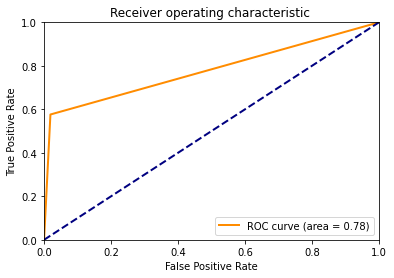

In [37]:
# ## plot AUC
# fpr, tpr, _ = roc_curve(test_labels[1:], pred_labels[1:,1]   )

# print(np.shape(fpr))
# roc_auc= auc(fpr, tpr)
# # print(fpr)
# print('AUC' + str(roc_auc))
i = 0
fpr = fprs[i]
tpr = tprs[i]
roc_auc = roc_aucs[i]
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic ")
plt.legend(loc="lower right")
plt.show()